In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
def smooth(arr, alpha=0.1):
    smoothed = []
    for i in range(len(arr)):
        if i == 0:
            smoothed.append(arr[i])
        else:
            smoothed.append((1-alpha)*smoothed[-1]+alpha*arr[i])
    return np.array(smoothed)

In [138]:
def plot_results(results, titles, dim_range):
    linewidth = 4
    fontsize = 15

    num_plots = len(results)
    plt.figure(figsize=(7 * num_plots, 5))

    for i in range(num_plots):
        ax = plt.subplot(1, num_plots, i + 1)
        arr = results[i]

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth)
        ax.fill_between(dim_range, min_, max_, alpha=0.15)
        
        #smoothed = smooth(mean, alpha=0.2)
        #plt.plot(dim_range, smoothed, linewidth=2)

        plt.grid()
        plt.ylabel('Sum of rewards for episode', fontsize=fontsize)
        plt.xlabel('episode', fontsize=fontsize)
        plt.title(titles[i], fontsize=fontsize)

In [259]:
def plot_results_different(results_1, results_2, titles, dim_range,
                           reverse_order=False):
    linewidth = 4
    fontsize = 15

    num_plots = len(results_1)
    plt.figure(figsize=(7 * num_plots, 5))

    for i in range(num_plots):
        if not reverse_order:
            ax = plt.subplot(1, num_plots, i + 1)
            arr = results_1[i]

            min_ = arr.min(axis=0)
            max_ = arr.max(axis=0)
            mean = arr.mean(axis=0)

            plt.plot(dim_range, mean, linewidth=linewidth, label='baseline')
            ax.fill_between(dim_range, min_, max_, alpha=0.15)

            arr = results_2[i]

            min_ = arr.min(axis=0)
            max_ = arr.max(axis=0)
            mean = arr.mean(axis=0)

            plt.plot(dim_range, mean, linewidth=linewidth, label='UCB')
            ax.fill_between(dim_range, min_, max_, alpha=0.15)

        else:
            ax = plt.subplot(1, num_plots, i + 1)
            arr = results_2[i]
            min_ = arr.min(axis=0)
            max_ = arr.max(axis=0)
            mean = arr.mean(axis=0)

            plt.plot(dim_range, mean, linewidth=linewidth, label='UCB', color='#ff7f0e')
            ax.fill_between(dim_range, min_, max_, alpha=0.15)

            
            arr = results_1[i]

            min_ = arr.min(axis=0)
            max_ = arr.max(axis=0)
            mean = arr.mean(axis=0)

            plt.plot(dim_range, mean, linewidth=linewidth, label='baseline', color='#1f77b4')
            ax.fill_between(dim_range, min_, max_, alpha=0.15)

            
        #smoothed = smooth(mean, alpha=0.2)
        #plt.plot(dim_range, smoothed, linewidth=2)

        plt.grid()
        plt.ylabel('Sum of rewards for episode', fontsize=fontsize)
        plt.xlabel('episode', fontsize=fontsize)
        plt.title(titles[i], fontsize=fontsize)
        plt.legend(loc='lower right')

In [239]:
cart_pole_results = np.load('results/dqn_environments/cartpole.npy')

In [240]:
n_seeds, n_episodes = cart_pole_results.shape

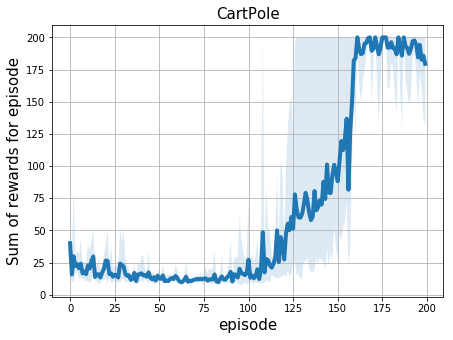

In [241]:
plot_results([cart_pole_results], ['CartPole'], np.arange(n_episodes))

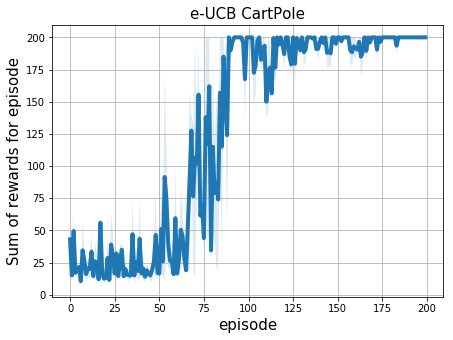

In [242]:
cart_pole_results_e_ucb = np.load('results/dqn_environments/cartpole_ucb.npy')
n_seeds, n_episodes = cart_pole_results_e_ucb.shape
plot_results([cart_pole_results_e_ucb[:2]], ['e-UCB CartPole'], np.arange(n_episodes))

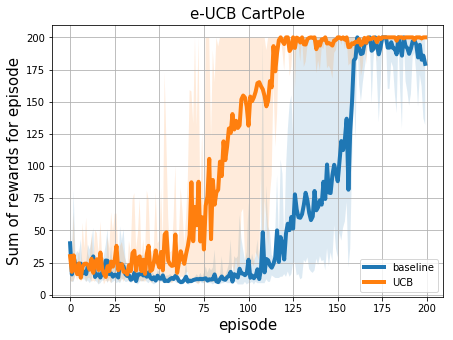

In [243]:
plot_results_different([cart_pole_results], [cart_pole_results_e_ucb],  ['e-UCB CartPole'], np.arange(n_episodes))

In [244]:
acrobot_results = np.load('results/dqn_environments/acrobot.npy')
n_seeds, n_episodes = acrobot_results.shape

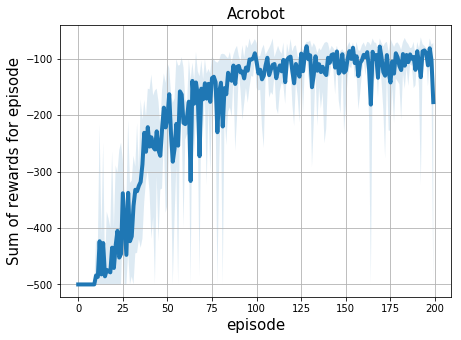

In [245]:
plot_results([acrobot_results], ['Acrobot'], np.arange(n_episodes))

In [246]:
ucb_acrobot_results = np.load('results/dqn_environments/acrobot_ucb.npy')
n_seeds, n_episodes = ucb_acrobot_results.shape

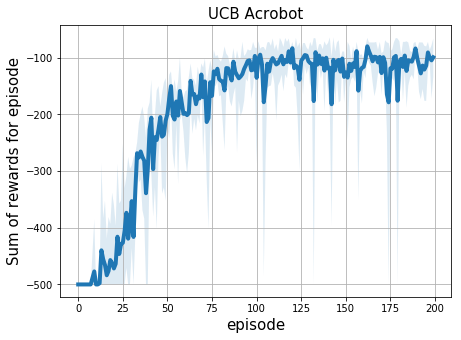

In [247]:
plot_results([ucb_acrobot_results], ['UCB Acrobot'], np.arange(n_episodes))

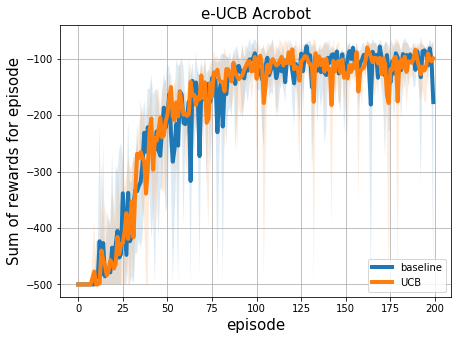

In [248]:
plot_results_different([acrobot_results], [ucb_acrobot_results],  ['e-UCB Acrobot'], np.arange(n_episodes))

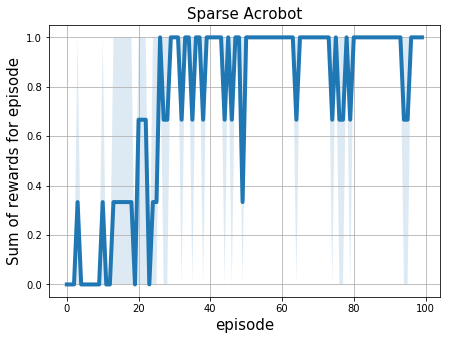

In [249]:
sparse_acrobot_results = np.load('results/dqn_environments/sparse_acrobot_low_eps.npy')
n_seeds, n_episodes = sparse_acrobot_results.shape
plot_results([sparse_acrobot_results], ['Sparse Acrobot'], np.arange(n_episodes))

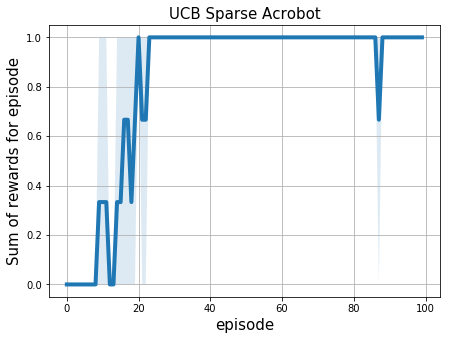

In [250]:
sparse_acrobot_ucb_results = np.load('results/dqn_environments/sparse_acrobot_ucb.npy')
n_seeds, n_episodes = sparse_acrobot_ucb_results.shape
plot_results([sparse_acrobot_ucb_results], ['UCB Sparse Acrobot'], np.arange(n_episodes))

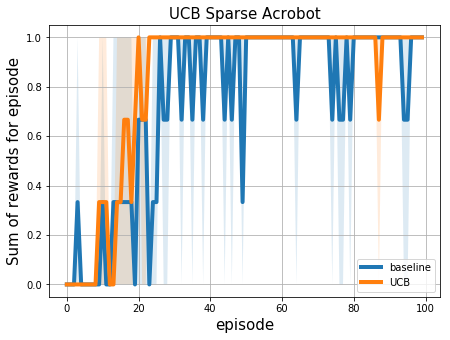

In [251]:
plot_results_different([sparse_acrobot_results], [sparse_acrobot_ucb_results],
                       ['UCB Sparse Acrobot'], np.arange(n_episodes))

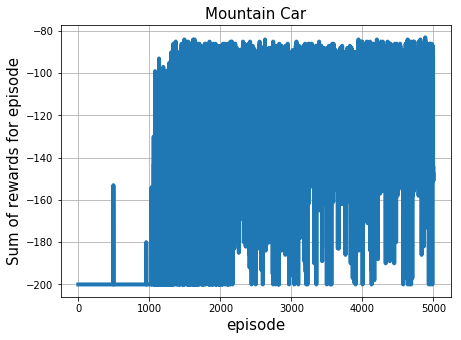

In [266]:
mcar_results = np.load('results/dqn_environments/mountain_car_1.npy')
mcar_results = mcar_results[:1,:5000]
n_seeds, n_episodes = mcar_results.shape
plot_results([mcar_results], ['Mountain Car'], np.arange(n_episodes))

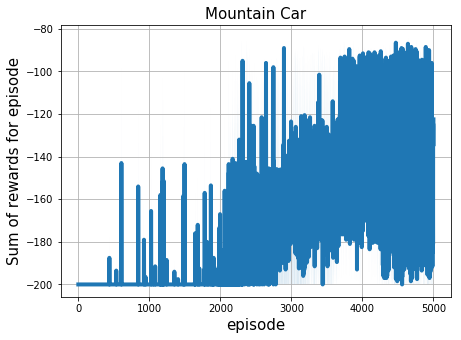

In [263]:
mcar_results_ucb = np.load('results/dqn_environments/mountaincar_ucb.npy')
mcar_results_ucb = mcar_results_ucb[:2,:5000]
n_seeds, n_episodes = mcar_results_ucb.shape
plot_results([mcar_results_ucb], ['Mountain Car'], np.arange(n_episodes))

array([-843902., -922498.,       0.])

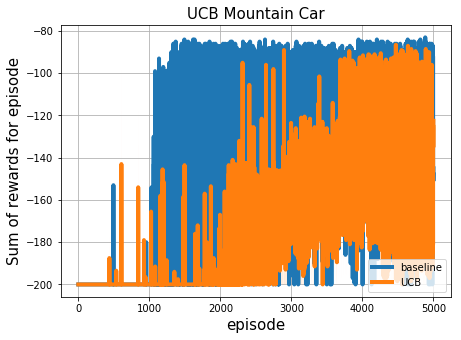

In [268]:
plot_results_different([mcar_results], [mcar_results_ucb],
                       ['UCB Mountain Car'], np.arange(n_episodes), reverse_order=False)

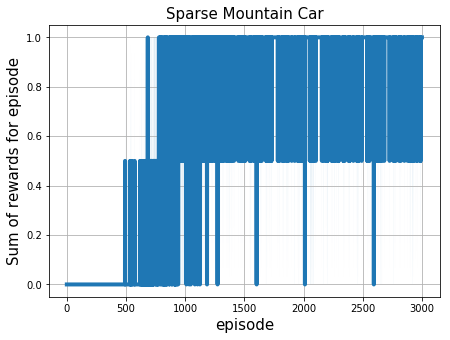

In [271]:
sparse_mcar_results = np.load('results/dqn_environments/mountain_car_sparse.npy')
sparse_mcar_results = sparse_mcar_results[:2]
n_seeds, n_episodes = sparse_mcar_results.shape
plot_results([sparse_mcar_results], ['Sparse Mountain Car'], np.arange(n_episodes))

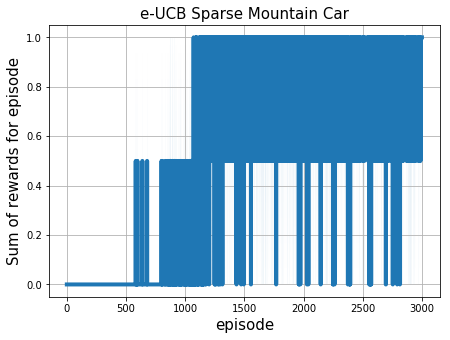

In [272]:
mcar_results_sparse_ucb = np.load('results/dqn_environments/mountain_car_sparse_ucb.npy')
mcar_results_sparse_ucb = mcar_results_sparse_ucb[:2]
n_seeds, n_episodes = mcar_results_sparse_ucb.shape
plot_results([mcar_results_sparse_ucb], ['e-UCB Sparse Mountain Car'], np.arange(n_episodes))

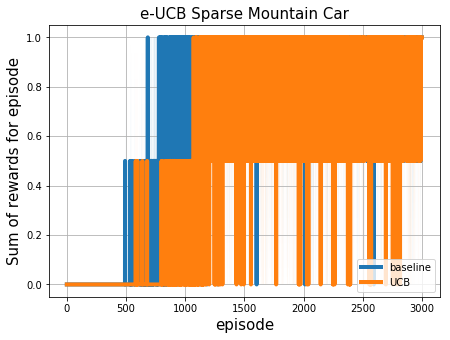

In [273]:
plot_results_different([sparse_mcar_results], [mcar_results_sparse_ucb],
                       ['e-UCB Sparse Mountain Car'], np.arange(n_episodes))

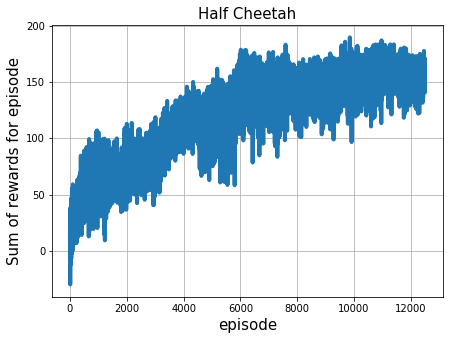

In [121]:
half_cheetah_results = np.load('results/trpo_environments/half_cheetah_rewards.npy')
if len(half_cheetah_results.shape) == 1:
    half_cheetah_results = half_cheetah_results[np.newaxis]
n_seeds, n_episodes = half_cheetah_results.shape
plot_results([half_cheetah_results], ['Half Cheetah'], np.arange(n_episodes))

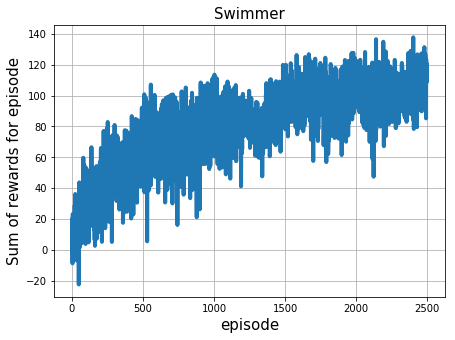

In [122]:
swimmer = np.load('results/trpo_environments/swimmer_rewards.npy')
if len(swimmer.shape) == 1:
    swimmer = swimmer[np.newaxis]
n_seeds, n_episodes = swimmer.shape
plot_results([swimmer], ['Swimmer'], np.arange(n_episodes))

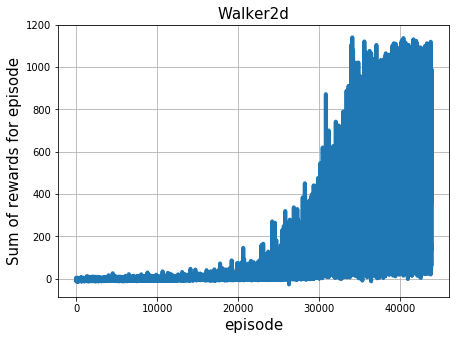

In [123]:
walker = np.load('results/trpo_environments/walker_rewards.npy')
if len(walker.shape) == 1:
    walker = walker[np.newaxis]
n_seeds, n_episodes = walker.shape
plot_results([walker], ['Walker2d'], np.arange(n_episodes))

In [34]:
import gym

In [38]:
env = gym.make('Pendulum-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [39]:
env.action_space

Box(1,)